In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from IPython.display import Image
from IPython import display
%matplotlib inline
np.random.seed(7777)

In [8]:
class TravellingSalesMan:
    def __init__(self,_no_of_neurons,
                 _lattice_radius,
                 _lattice_center,
                 _eta):
        
        self.no_of_neurons = _no_of_neurons
        self.lattice_radius = _lattice_radius
        self.lattice_center = _lattice_center
        self.eta = _eta
        
        self.current_weights = self.points_in_circle()
    
    '''
    find euclidean distance between two coordinates
    '''
    def euclidean_distance_2d(self,x, y):
        return math.sqrt(pow(y[0]-x[0],2) + pow(y[1]-x[1],2))
    
    '''
    find euclidean distance between given input 
    and all neurons weight, and return winning neuron 
    with shortest distance 
    '''
    def get_winner(self,x):
        return min([(self.euclidean_distance_2d(x,w),index) 
                   for index,w in enumerate(self.current_weights)])[1]
        
    def get_cities(self):
        return np.array([[12.66,45.72], #wismar
                         [65.52,90.72], #schwerin
                         [39.98,21.90], #rostock
                         [30.77,60.57], #stralsund
                         [10.73,81.12], #greifswald
                         [98.88,34.65]]) #neubrandenberg
    def plot_cities(self):
        #city labels
        city_labels = ['wismar','schwerin','rostock',
                       'stralsund','greifswald',
                       'neubrandenberg']
        
        #getting x,y coordinates of cities
        cities = self.get_cities()
        cities_x = cities[:,0:1]
        cities_y = cities[:,1:2]
        
        #configuration for plot
        fig, ax = plt.subplots()
        plt.xlim([1,120])
        plt.ylim([1,120])
        fig.set_figheight(9)
        fig.set_figwidth(15)
        
        ax.plot(cities_x, cities_y,'ro')
        ax.add_patch(plt.Circle((60,60), radius=10, color='g', 
                                fill=False))
        
#         current_weights = self.current_weights
#         print self.current_weights
        ax.plot(self.current_weights[:,0:1],self.current_weights[:,1:2],'bo')  
        
        #showing name of the cities in the plot
        for i, label in enumerate(city_labels):
            ax.annotate(label, (cities_x[i]+1,cities_y[i]+1))
            
        #showing name of the neurons in the plot
#         print current_weights
        for index, weight in enumerate(self.current_weights):
            ax.annotate(index, (weight[0]+0.5,weight[1]+1.5))
            
    def points_in_circle(self):
        points = np.empty((0,2))
        circle_center = self.lattice_center
        radius = self.lattice_radius
        n = self.no_of_neurons
        for x in xrange(0,n+1):
            point = [circle_center[0]+np.cos(2*np.pi/n*x)*radius,
                     circle_center[1]+np.sin(2*np.pi/n*x)*radius]
            points = np.vstack([points,point])
        return points   
    
    def weight_adaptation(self,index,x):
        current_weight = self.current_weights[index]
        new_weight = (current_weight + (self.eta*(x-current_weight)))
        self.current_weights[index] = new_weight
        return True
    
    def train(self):
        cities = self.get_cities()
        for epoch in range(10000):
            for city in cities: 
                winner_neuron = self.get_winner(city)
                self.weight_adaptation(winner_neuron,city)

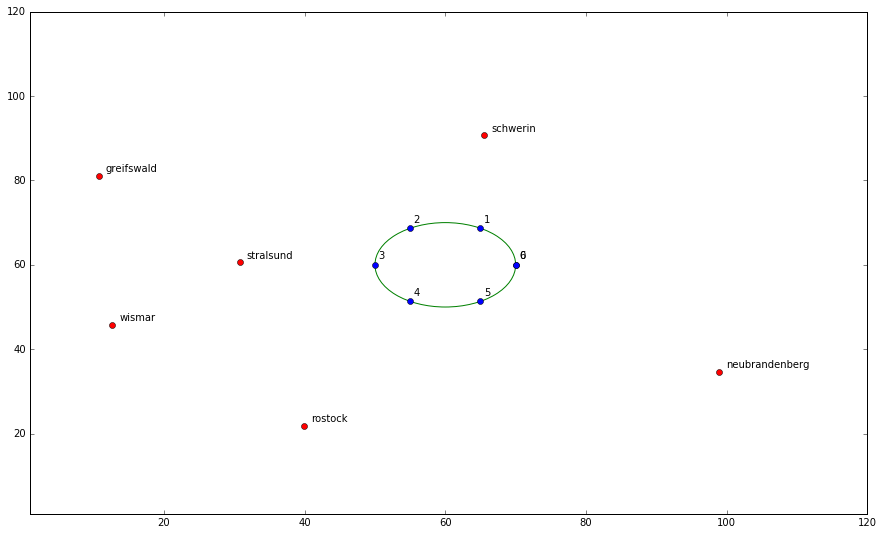

In [9]:
x_location = np.array([[5,6]])
neuron_locations = np.array([[1,2],[2,4]])

no_of_neurons = 6
lattice_radius = 10
lattice_center = (60,60)
eta = 0.1

tsm = TravellingSalesMan(no_of_neurons,
                        lattice_radius,
                        lattice_center,eta)

# tsm.get_winner(x_location[0],neuron_locations)
points = tsm.plot_cities()
tsm.train()


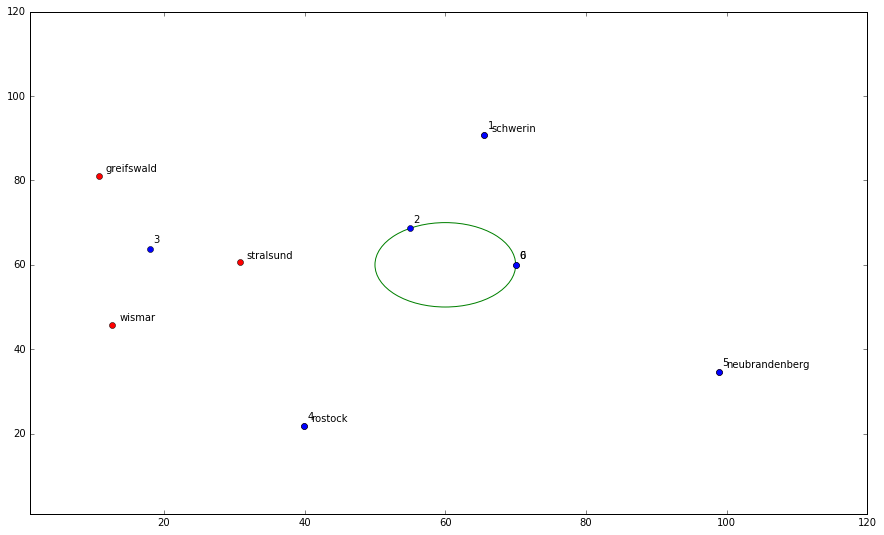

In [10]:
points = tsm.plot_cities()

In [62]:
def point_on_circle():
    '''
        Finding the x,y coordinates on circle, based on given angle
    '''
    from math import cos, sin, pi
    #center of circle, angle in degree and radius of circle
    center = [0,0]
    angle = pi / 2
    radius = 100
    x = center[0] + (radius * cos(angle))
    y = center[1] + (radius * sin(angle))

    plt.scatter(x,y)

In [66]:
from math import cos, sin, pi

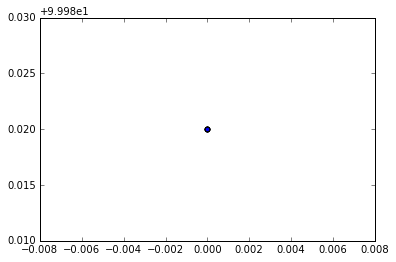

In [64]:
for i in range(10):
    point_on_circle()

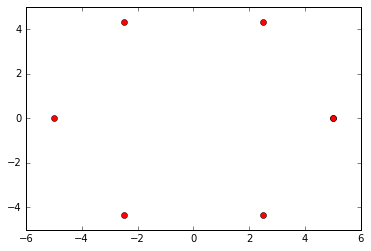

In [77]:
def PointsInCircum(r,n):
    points = np.empty((0,2))
    for x in xrange(0,n+1):
        point = [math.cos(2*pi/n*x)*r,math.sin(2*pi/n*x)*r]
        points = np.vstack([points,point])
    return points
points = PointsInCircum(5,6)
plt.plot(points[:,0:1],points[:,1:2],'ro')

# for point in points:
# #     print point[0]
#     plt.scatter(point[0],point[1])

In [80]:
plt.Circle((0,0), radius=5, color='g', fill=False)
plt.show()

In [40]:
def get_city():
    return [np.random.uniform(0.0,100.0),np.random.uniform(0.0,100.0)]

def get_cities(num):
    cities = np.empty((0,2))
    for i in range(num):
        cities = np.vstack([cities,get_city()])
    return cities

[[ 12.66598068  45.72256455]
 [ 28.52045308  50.72582481]
 [ 39.98834589  21.90808716]
 [ 59.77420859  20.57412745]
 [ 10.73118319  81.12670542]
 [ 98.88352563  34.65956376]
 [ 37.04629745  84.10107355]
 [ 52.03491115  60.47513001]
 [ 72.76871997  64.85699631]
 [  7.42011785  92.44269207]
 [ 37.56227309  95.19841286]
 [  4.55276678  17.59981177]
 [ 11.32113194  68.03498754]
 [ 53.36832676  74.11707906]
 [ 68.74770579  16.14160638]
 [ 16.70089402  73.68155185]
 [  1.74032373  69.30335602]
 [ 45.72796491  55.43610257]
 [ 54.54958106  21.8753066 ]
 [ 75.49494365  48.99646172]]


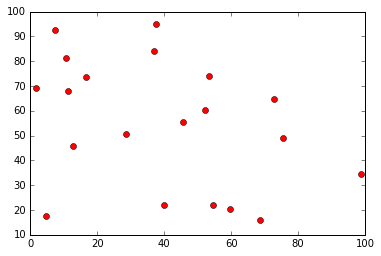

In [42]:
cities = get_cities(20)
print cities
plt.plot(cities[:,0:1],cities[:,1:2],'ro')

<IPython.core.display.Javascript object>


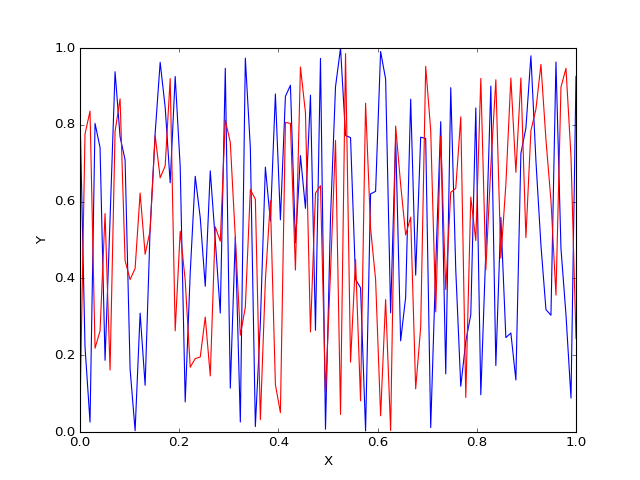

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(50):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)